In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv(r"D:\my_project\Inferential_Statistical_Analysis\insurance.csv")

print("Shape:", df.shape)
print("Info:",df.info())
print("Missing values:",df.isnull().sum())


Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Info: None
Missing values: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Charges Statistics:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
Skewness: 1.52
Kurtosis: 1.61


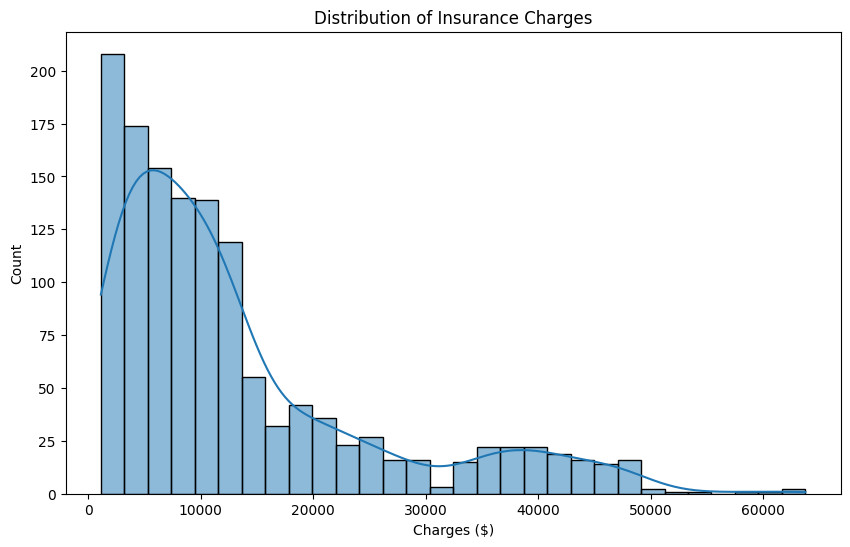

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Count')

# Kiểm tra phân phối
print("Charges Statistics:")
print(df['charges'].describe())
print(f"Skewness: {df['charges'].skew():.2f}")
print(f"Kurtosis: {df['charges'].kurtosis():.2f}")

Text(0.5, 1.0, 'Correlation Matrix')

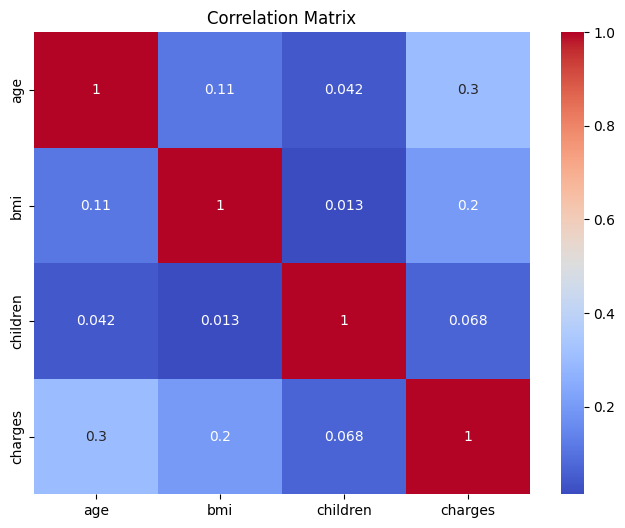

In [4]:
# Correlation matrix cho các biến number
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


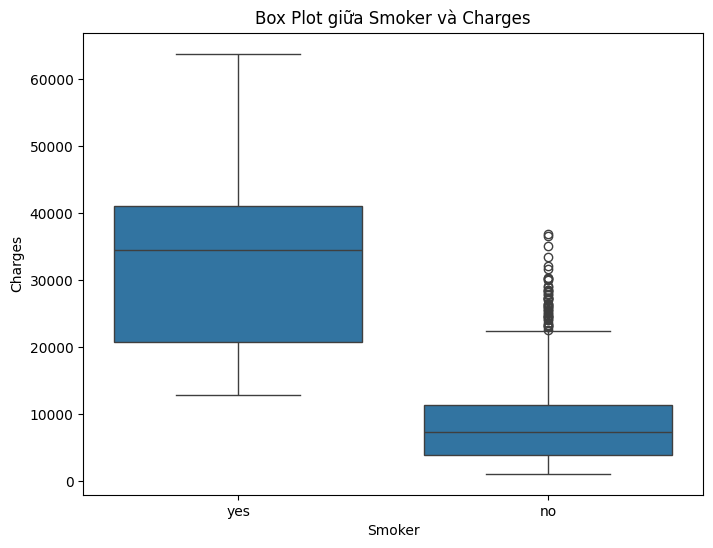

In [5]:
# Vẽ box plot giữa Smoker và Charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
# Thêm nhãn cho các trục
plt.xlabel('Smoker')
plt.ylabel('Charges')
# Thêm tiêu đề
plt.title('Box Plot giữa Smoker và Charges')
# Hiển thị biểu đồ
plt.show()

In [6]:
# Tính xác suất có charges cao theo các biến độc lập
mean_charges = df['charges'].mean()

def xs(condition):
    subset = df[condition]
    p = len(subset[subset['charges'] > mean_charges]) / len(subset)
    return p

# Tính Xác suất theo smoking
p_high_charges_smoke = xs(df['smoker'] == 'yes')
p_high_charges_non_smoke = xs(df['smoker'] == 'no')

print("Conditional Probabilities:")
print(f"P(High Charges|Smoke) = {p_high_charges_smoke:.2f}")
print(f"P(High Charges|Non-Smoke) = {p_high_charges_non_smoke:.2f}")

# Xác suất theo BMI
bmi_nguong = 30  # Ngưỡng béo 
p_high_charges_high_bmi = xs(df['bmi'] > bmi_nguong)
print(f"P(High Charges | BMI > 30) = {p_high_charges_high_bmi:.2f}")

Conditional Probabilities:
P(High Charges|Smoke) = 1.00
P(High Charges|Non-Smoke) = 0.14
P(High Charges | BMI > 30) = 0.33
